In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
# Viz Imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Increase the maximum number of columns displayed in Pandas to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.precision', 2)
# pd.options.display.float_format = '{:.0f}'.format
# Set the default style of Matplotlib plots to "ggplot"
plt.style.use('ggplot')
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")

# All imports here
from sklearn.compose import make_column_selector

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.dummy import DummyClassifier
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import StackingClassifier, VotingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

In [5]:
file_list = ['Base.csv', 'variant_1.csv', 'variant_2.csv', 'variant_3.csv', 'variant_4.csv', 'variant_5.csv']

In [6]:
intellifraud_dataset = pd.DataFrame()

for file in file_list:
    input_df = pd.read_csv(f"../data/{file}")
    print('File Name : ', file)
    print(f'Rows - {input_df.shape[0]}, Columns - {input_df.shape[1]}')
    print(input_df['fraud_bool'].value_counts())

    # Append the data into fraud dataset
    intellifraud_dataset = intellifraud_dataset.append(input_df)

print('Shape of intellifraud_dataset : ', intellifraud_dataset.shape)

File Name :  Base.csv
Rows - 1000000, Columns - 32
0    988971
1     11029
Name: fraud_bool, dtype: int64
File Name :  variant_1.csv
Rows - 1000000, Columns - 32
0    988971
1     11029
Name: fraud_bool, dtype: int64
File Name :  variant_2.csv
Rows - 1000000, Columns - 32
0    988971
1     11029
Name: fraud_bool, dtype: int64
File Name :  variant_3.csv
Rows - 1000000, Columns - 34
0    988970
1     11030
Name: fraud_bool, dtype: int64
File Name :  variant_4.csv
Rows - 1000000, Columns - 32
0    988970
1     11030
Name: fraud_bool, dtype: int64
File Name :  variant_5.csv
Rows - 1000000, Columns - 34
0    988970
1     11030
Name: fraud_bool, dtype: int64
Shape of intellifraud_dataset :  (6000000, 34)


In [7]:
# input_df = pd.read_csv(f"../data/Base.csv")

In [8]:
# Checking the datatype of the columns
intellifraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   fraud_bool                        int64  
 1   income                            float64
 2   name_email_similarity             float64
 3   prev_address_months_count         int64  
 4   current_address_months_count      int64  
 5   customer_age                      int64  
 6   days_since_request                float64
 7   intended_balcon_amount            float64
 8   payment_type                      object 
 9   zip_count_4w                      int64  
 10  velocity_6h                       float64
 11  velocity_24h                      float64
 12  velocity_4w                       float64
 13  bank_branch_count_8w              int64  
 14  date_of_birth_distinct_emails_4w  int64  
 15  employment_status                 object 
 16  credit_risk_score                 int

In [9]:
# Extract Continuous & Categorical Columns
cat_cols = intellifraud_dataset.select_dtypes(include=['object']).columns.tolist()
cont_cols = intellifraud_dataset.select_dtypes(exclude=['object']).columns.tolist()
print(f'Categorical Columns - {cat_cols}')
print("=========================================")
print(f'Continuous Columns - {cont_cols}')

Categorical Columns - ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
Continuous Columns - ['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'x1', 'x2']


In [10]:
# Get Information on Categorical/Object Variables
intellifraud_dataset.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,6000000,5,AB,2328127
employment_status,6000000,7,CA,4205660
housing_status,6000000,7,BC,2099833
source,6000000,2,INTERNET,5955260
device_os,6000000,5,linux,2012206


In [11]:
# Printing the unique values of Categorcal columns
for cols in cat_cols:
    print(cols, '-', intellifraud_dataset[cols].unique())

payment_type - ['AA' 'AB' 'AC' 'AD' 'AE']
employment_status - ['CA' 'CB' 'CC' 'CD' 'CE' 'CF' 'CG']
housing_status - ['BA' 'BB' 'BC' 'BD' 'BE' 'BF' 'BG']
source - ['INTERNET' 'TELEAPP']
device_os - ['windows' 'other' 'linux' 'macintosh' 'x11']


In [12]:
# Details of Numeric Columns
intellifraud_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,6.00e+06,0.01,0.10,0.00e+00,0.00e+00,0.00e+00,0.00,1.00
income,6.00e+06,0.57,0.29,1.00e-01,3.00e-01,6.00e-01,0.80,0.90
name_email_similarity,6.00e+06,0.49,0.29,5.02e-08,2.18e-01,4.89e-01,0.75,1.00
prev_address_months_count,6.00e+06,15.43,43.40,-1.00e+00,-1.00e+00,-1.00e+00,9.00,399.00
current_address_months_count,6.00e+06,94.53,92.25,-1.00e+00,2.40e+01,5.90e+01,146.00,429.00
customer_age,6.00e+06,38.50,13.66,1.00e+01,3.00e+01,4.00e+01,50.00,90.00
days_since_request,6.00e+06,0.95,5.16,4.04e-09,7.35e-03,1.55e-02,0.03,78.46
intended_balcon_amount,6.00e+06,8.61,20.44,-1.57e+01,-1.18e+00,-8.32e-01,1.38,113.12
zip_count_4w,6.00e+06,1544.54,986.36,1.00e+00,8.91e+02,1.23e+03,1891.00,6830.00
velocity_6h,6.00e+06,5580.44,2975.48,-1.74e+02,3.39e+03,5.26e+03,7528.19,16817.84


In [13]:
# Printing the unique count of Cont columns
# Get the number of unique values in each column of the DataFrame
intellifraud_dataset.nunique()

fraud_bool                                2
income                                    9
name_email_similarity               2851749
prev_address_months_count               380
current_address_months_count            429
customer_age                              9
days_since_request                  2774836
intended_balcon_amount              2820050
payment_type                              5
zip_count_4w                           6438
velocity_6h                         2850954
velocity_24h                        2853020
velocity_4w                         2847484
bank_branch_count_8w                   2362
date_of_birth_distinct_emails_4w         40
employment_status                         7
credit_risk_score                       561
email_is_free                             2
housing_status                            7
phone_home_valid                          2
phone_mobile_valid                        2
bank_months_count                        33
has_other_cards                 

In [14]:
# Printing the unique values of Categorcal columns
discreet_column = []
for cols in cont_cols:
    if len(list(intellifraud_dataset[cols].unique())) < 15:
        discreet_column.append(cols)
        print(cols, '-', intellifraud_dataset[cols].unique())
discreet_column

fraud_bool - [1 0]
income - [0.9 0.3 0.7 0.6 0.4 0.2 0.8 0.1 0.5]
customer_age - [50 40 30 20 70 60 80 10 90]
email_is_free - [0 1]
phone_home_valid - [1 0]
phone_mobile_valid - [0 1]
has_other_cards - [0 1]
proposed_credit_limit - [ 500. 1500.  200. 2000. 1900. 1000.  990.  490.  510.  190.  210. 2100.]
foreign_request - [0 1]
keep_alive_session - [0 1]
device_distinct_emails_8w - [ 1  2  0 -1]
device_fraud_count - [0]
month - [7 3 2 1 6 0 5 4]


['fraud_bool',
 'income',
 'customer_age',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

[Text(0, 0.0, ''),
 Text(0, 1000000.0, ''),
 Text(0, 2000000.0, ''),
 Text(0, 3000000.0, ''),
 Text(0, 4000000.0, ''),
 Text(0, 5000000.0, ''),
 Text(0, 6000000.0, ''),
 Text(0, 7000000.0, '')]

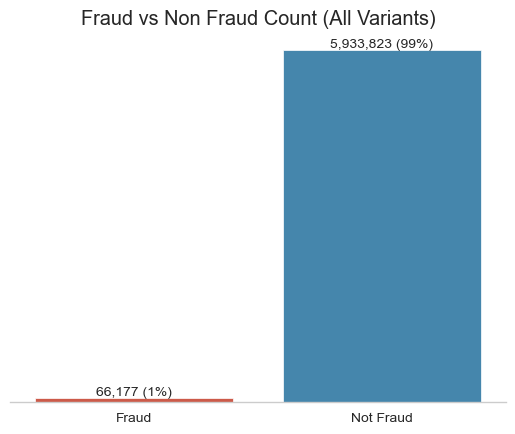

In [15]:
# EDA to explore Fraud vs Non Fraud
fraud_count = intellifraud_dataset["fraud_bool"].map({1:'Fraud', 0:'Not Fraud'}).to_frame()
ax = sns.countplot(
                    x=fraud_count['fraud_bool'],
                    order=fraud_count['fraud_bool'].value_counts(ascending=True).index
                )
        
abs_values = fraud_count['fraud_bool'].value_counts(ascending=True)
rel_values = fraud_count['fraud_bool'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]:,.0f} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set(title ='Fraud vs Non Fraud Count (All Variants)')
ax.grid(False)
sns.despine(left=True)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_yticklabels([])

## Convert All Columns to Numeric

In [16]:
def map_categorical_column(df):
    
    ''' Function to map the categorical columns '''
     
    map_payment_type      = {'AA':0, 'AB':1, 'AC':2, 'AD':3, 'AE':4}
    map_employment_status = {'CA':0, 'CB':1, 'CC':2, 'CD':3, 'CE':4,'CF':5,'CG':6}
    map_housing_status    = {'BA':0, 'BB':1, 'BC':2, 'BD':3, 'BE':4,'BF':5,'BG':6}
    map_source            = {'INTERNET':0,'TELEAPP':1}
    map_device_os         = {'windows':0,'other':1,'linux':2,'macintosh':3,'x11':4}
    
    # Updating the mapping in dataframe
    df["payment_type"]                 = df["payment_type"].map(map_payment_type)
    df["employment_status"]            = df["employment_status"].map(map_employment_status)
    df["housing_status"]               = df["housing_status"].map(map_housing_status)
    df["source"]                       = df["source"].map(map_source)
    df["device_os"]                    = df["device_os"].map(map_device_os)

    return df

In [17]:
# input_df_copy = input_df.copy()
intellifraud_dataset_num = map_categorical_column(intellifraud_dataset)
intellifraud_dataset_num.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,1,0.9,0.17,-1,88,50,2.09e-02,-1.33,0,769,10650.77,3134.32,3863.65,1,6,0,185,0,0,1,0,24,0,500.0,0,0,3.89,0,0,1,0,7,NaN,NaN
1,1,0.9,0.30,-1,144,50,5.42e-03,-0.82,1,366,534.05,2670.92,3124.30,718,3,0,259,1,0,0,0,15,0,1500.0,0,0,31.80,0,0,1,0,7,NaN,NaN
2,1,0.9,0.04,-1,132,40,3.11e+00,-0.76,2,870,4048.53,2893.62,3159.59,1,14,1,177,1,0,0,1,-1,0,200.0,0,0,4.73,1,0,1,0,7,NaN,NaN
3,1,0.9,0.16,-1,22,50,1.91e-02,-1.21,1,810,3457.06,4054.91,3022.26,1921,6,0,110,1,0,0,1,31,1,200.0,0,0,2.05,2,0,1,0,7,NaN,NaN
4,1,0.9,0.60,-1,218,50,4.44e-03,-0.77,1,890,5020.34,2728.24,3087.67,1990,2,0,295,1,0,1,0,31,0,1500.0,0,0,3.78,3,1,1,0,7,NaN,NaN


In [18]:
intellifraud_dataset_num.fraud_bool.value_counts()

0    5933823
1      66177
Name: fraud_bool, dtype: int64

## Features Selection

In [19]:
# Import the necessary libraries for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, chi2, mutual_info_classif
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.under_sampling import NearMiss
from collections import Counter

##### Variance Threshold Test - Removes all low-variance features.

In [20]:
# True: High Variance ; #False: Low Variance
selector = VarianceThreshold()
selector.fit(intellifraud_dataset_num)
low_variance_col = [column for column in intellifraud_dataset_num.columns if column not in intellifraud_dataset_num.columns[selector.get_support()]]
low_variance_col


['device_fraud_count']

##### Pearson's Correlation Matrix - Remove highly correlated features

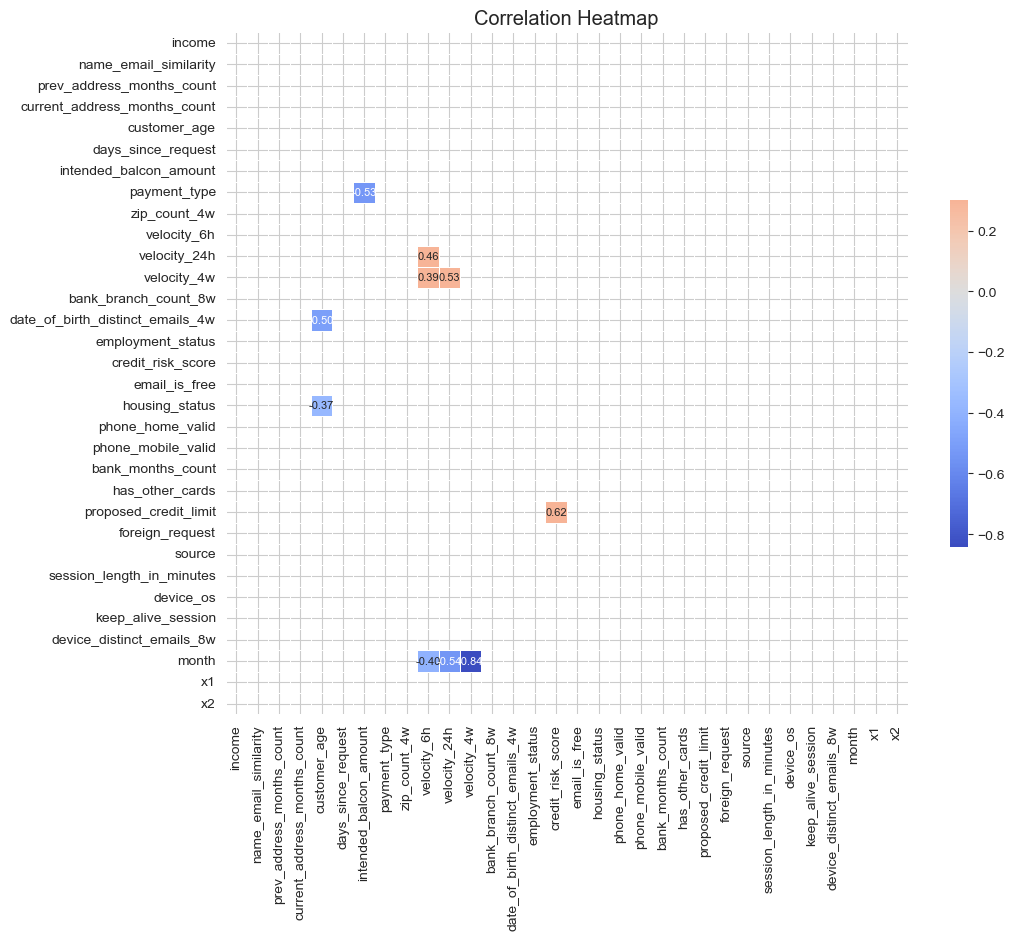

In [21]:
# Multicollinearity Test
corr = intellifraud_dataset_num.drop(columns=['device_fraud_count', 'fraud_bool']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
            corr[(corr >= 0.3) | (corr <= -0.3)], 
            mask=mask,
            cmap='coolwarm', 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            annot=True, 
            annot_kws={"fontsize": 8},
            fmt=".2f", 
)

plt.title('Correlation Heatmap')
plt.show()

velocity_4w can re removed. It shows strong co-linearity with Month

In [43]:
# ##### Recursive Feature Elimination

# Fraud Transactions
intellifraud_df_fraud = intellifraud_dataset_num[intellifraud_dataset_num.fraud_bool == 1]
display(f'Shape of train_df_fraud {intellifraud_df_fraud.shape}')

# Non Fraud Transactions
intellifraud_df_non_fraud = intellifraud_dataset_num[intellifraud_dataset_num.fraud_bool == 0].sample(intellifraud_df_fraud.shape[0])
display(f'Shape of train_df_non_fraud {intellifraud_df_non_fraud.shape}')

# Merge Fraud & Non Fraud
train_df_merged = pd.concat([intellifraud_df_fraud, intellifraud_df_non_fraud])
display(f'Shape of train_df_merged {train_df_merged.shape}')

# Fit Model
X                 = train_df_merged.drop(columns=['fraud_bool', 'device_fraud_count', 'velocity_4w', 'x1', 'x2'])
y                 = train_df_merged['fraud_bool']

clf = RandomForestClassifier(random_state=42, max_depth=10).fit(X, y)

'Shape of train_df_fraud (66177, 34)'

'Shape of train_df_non_fraud (66177, 34)'

'Shape of train_df_merged (132354, 34)'

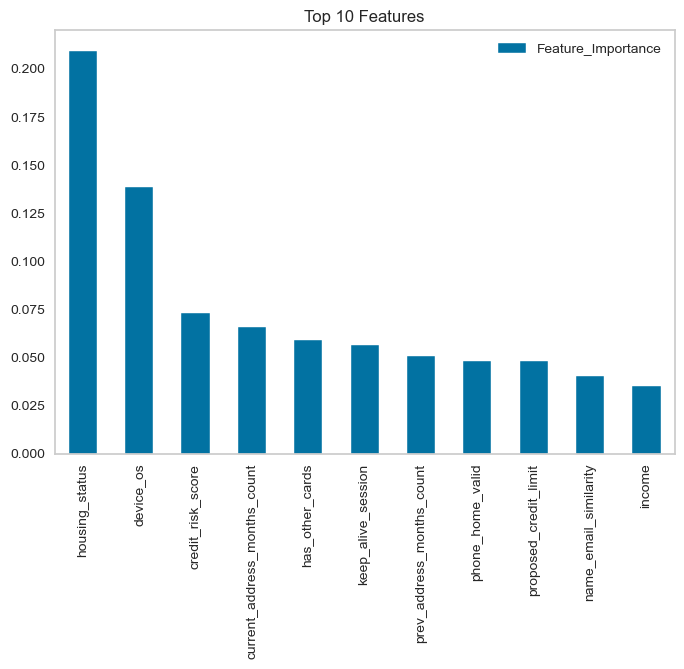

In [63]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                    index = X.columns,
                                    columns=['Feature_Importance']).sort_values('Feature_Importance', ascending=False
                                            )
# display(feature_importances)
# display('Feature Importance:', feature_importances['Feature_Importance'])
ax = feature_importances.head(11).plot(kind="bar")
ax.set(title ='Top 10 Features')
ax.grid(False)

In [64]:
feature_importances.head(11)

,Feature_Importance
housing_status,0.21
device_os,0.14
credit_risk_score,0.07
current_address_months_count,0.07
has_other_cards,0.06
keep_alive_session,0.06
prev_address_months_count,0.05
phone_home_valid,0.05
proposed_credit_limit,0.05
name_email_similarity,0.04


### Define Initial Models for Effective Attributes

In [23]:
# Function for Precsion, Recall and F1 Score
def calc_classfier_metric(classifier, y_test, y_pred):
    '''
    Function for Precsion, Recall and F1 Score
    '''
    accuracy      = accuracy_score(y_test, y_pred)
    precision     = precision_score(y_test, y_pred)
    recall        = recall_score(y_test, y_pred)
    F1_score      = f1_score(y_test, y_pred)
    roc_auc_scr   = roc_auc_score(y_test, y_pred)
    conf_mat      = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    
    return accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, fpr, tpr

In [24]:
# Build Classification Model
def build_individual_classifier_model(X_train, X_test, y_train, y_test, classifier_model, under_sample_size):
    '''
    Function to Build Classification Model for Individual Classifier
    '''
    print('Into build_individual_classifier_model')
    
    classifier_performance = []
    cnf_lst = []

    for classifier in classifier_model:

        # Fitting the training set into classification model
        classifier.fit(X_train,y_train)

        # Predicting the output on test datset
        y_pred = classifier.predict(X_test)    

        # Cross Validation Score on training test
        cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)
        scores = cross_val_score(classifier, X_train,y_train, cv=5, scoring='f1_weighted')
        cv_score_mean = scores.mean()

        # Classification score
        accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, fpr, tpr = calc_classfier_metric(classifier, y_test, y_pred)
        classifier_performance.append([classifier.__class__.__name__, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr, cv_score_mean, fpr, tpr])
        
        # Store the model into pkl
        joblib.dump(classifier, f'../model/sample_1_{under_sample_size}/{classifier.__class__.__name__}.pkl')
     
    class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr', 'CV_Score', 'FPR', 'TPR']).sort_values('F1_Score', ascending = False)
    
    return class_perf_df

In [46]:
def build_voting_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_class_model_df, under_sample_size):
    
    '''
    Function to Classifier Model for Voting Classifier
    '''
    
    print('Into build_voting_classifier_model')
    
    classifier_performance = []
    cnf_lst = []

    # Voting Classifier                
    clf1 = classifier_model[0]
    clf2 = classifier_model[1]
    clf3 = classifier_model[2]
    
    vote_classifier = VotingClassifier(
                                        estimators=[('ada', clf1),('xgb', clf2), ('lgb', clf3)],
                                        voting='soft'
                                    )
    
    # Fitting the training set into classification model
    vote_classifier.fit(X_train,y_train)

    # Predicting the output on test datset
    y_pred = vote_classifier.predict(X_test)    

    # Cross Validation Score on training test
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)
    scores = cross_val_score(vote_classifier, X_train,y_train, cv=5, scoring='f1_weighted')
    cv_score_mean = scores.mean()

    # Classification score
    accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, fpr, tpr = calc_classfier_metric(vote_classifier, y_test, y_pred)
    classifier_performance.append([vote_classifier.__class__.__name__, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr, cv_score_mean, fpr, tpr])
    
    # Store the model into pkl
    joblib.dump(vote_classifier, f'../model/sample_1_{under_sample_size}/{vote_classifier.__class__.__name__}.pkl')
        
    class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr', 'CV_Score', 'FPR', 'TPR']).sort_values('F1_Score', ascending = False)
    
    voting_class_df = pd.concat([ind_class_model_df, class_perf_df])
    
    return voting_class_df

In [47]:
# Build Classification Model
def build_stacking_classifier_model(X_train, X_test, y_train, y_test, classifier_model, prev_class_model_df, under_sample_size):
    
    '''
    Function to Classifier Model for Voting Classifier
    '''
    
    print('Into build_stacking_classifier_model')
    
    classifier_performance = []
    cnf_lst = []

    # Voting Classifier                
    clf1 = classifier_model[0]
    clf2 = classifier_model[1]
    clf3 = classifier_model[2]
    
    stacking_classifier = StackingClassifier(
                                                estimators = [('ada', clf1),('xgb', clf2), ('lgb', clf3)],
                                                final_estimator = LogisticRegression(),
                                                cv = 5
                                    )
    
    
    # Fitting the training set into classification model
    stacking_classifier.fit(X_train,y_train)

    # Predicting the output on test datset
    y_pred = stacking_classifier.predict(X_test)    

    # Cross Validation Score on training test
    cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)
    scores = cross_val_score(stacking_classifier, X_train,y_train, cv=5, scoring='f1_weighted')
    cv_score_mean = scores.mean()

    # Classification score
    accuracy, precision, recall, F1_score, roc_auc_scr, conf_mat, fpr, tpr = calc_classfier_metric(stacking_classifier, y_test, y_pred)
    classifier_performance.append([stacking_classifier.__class__.__name__, conf_mat, accuracy, precision, recall, F1_score, roc_auc_scr, cv_score_mean, fpr, tpr])
    
    # Store the model into pkl
    joblib.dump(stacking_classifier, f'../model/sample_1_{under_sample_size}/{stacking_classifier.__class__.__name__}.pkl')        
    class_perf_df = pd.DataFrame(classifier_performance, columns=['Classifier', 'Conf_Mtrx', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC_Scr', 'CV_Score', 'FPR', 'TPR']).sort_values('F1_Score', ascending = False)
    
    stacking_class_df = pd.concat([prev_class_model_df, class_perf_df])
    
    return stacking_class_df

In [48]:
# Function for Confusion Matrix
def view_confusion_matrix(class_perf_df, columns):
    '''
    Function for Confusion Matrix
    '''
    rows = int(class_perf_df.shape[0]/ columns)
    plt.figure(figsize=(15,13))

    for i in range(class_perf_df.shape[0]):
        plt.subplot(rows,columns,i+1)
        plt.title(class_perf_df['Classifier'].loc[i])
        ax=sns.heatmap(class_perf_df['Conf_Mtrx'].loc[i],
                    annot=True,
                    cmap="coolwarm",
                    fmt="d",
                    cbar=False, 
                    annot_kws={"size": 12},
                    linewidths=1.2,
                    linecolor='w',
                   )
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 10)
        ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)
        ax.set_xlabel('True label') 
        ax.set_ylabel('Predicted label')
    
    return

In [59]:
def create_sample_set(train_df, non_fraud_sample_sizse):
    
    # Select columns
    train_df = train_df[['housing_status',
                            'device_os',
                            'credit_risk_score',
                            'current_address_months_count',
                            'has_other_cards',
                            'keep_alive_session',
                            'prev_address_months_count',
                            'phone_home_valid',
                            'proposed_credit_limit',
                            'name_email_similarity',
                            'income',
                            'fraud_bool' 
                        ]]
                        
    # Fraud Transactions
    train_df_fraud = train_df[train_df.fraud_bool == 1]
    # display(f'Shape of train_df_fraud {train_df_fraud.shape}')
    
    # Non Fraud Transactions
    train_df_non_fraud = train_df[train_df.fraud_bool == 0].sample(train_df_fraud.shape[0] * non_fraud_sample_sizse)
    # display(f'Shape of train_df_non_fraud {train_df_non_fraud.shape}')
    
    # Merge Fraud & Non Fraud
    train_df_merged = pd.concat([train_df_fraud, train_df_non_fraud])
 
    # X & Y
    X                 = train_df_merged.drop(columns=['fraud_bool'])
    y                 = train_df_merged['fraud_bool']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    return X_train, y_train, X_test, y_test

In [62]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

def create_performance_graphs(X_test, y_test, sample_size):

    # Sample Ratio 1:1
    classifier_list = ['AdaBoostClassifier.pkl', 'LGBMClassifier.pkl', 'XGBClassifier.pkl', 'StackingClassifier.pkl', 'VotingClassifier.pkl']

    fig, [ax_roc, ax_prc] = plt.subplots(1, 2, figsize=(11, 5))

    for classifiers in classifier_list:
        classifier = joblib.load(f'../model/sample_1_{sample_size}/{classifiers}')
        y_pred = classifier.predict(X_test)
        RocCurveDisplay.from_predictions(y_test, y_pred, ax=ax_roc, name=classifier.__class__.__name__)
        PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=ax_prc, name=classifier.__class__.__name__)

    ax_roc.set_title(f"ROC-AUC Curve (1:{sample_size}) Ratio")
    ax_prc.set_title(f"Precision Recall Curve (1:{sample_size}) Ratio")

    ax_roc.grid(linestyle="--")
    ax_prc.grid(linestyle="--")

    return

In Sample Size 1, Traing Set - 105883 and Test Set - 26471
Into build_individual_classifier_model
Into build_voting_classifier_model
Into build_stacking_classifier_model
CPU times: total: 2min 51s
Wall time: 22min 51s


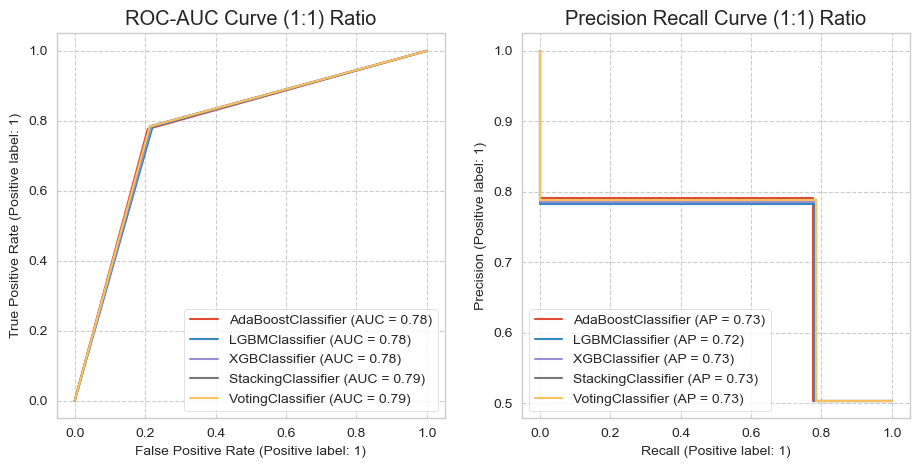

In [63]:
%%time
# Train Model with Different Sample Size

performance_dataset = pd.DataFrame()

sample_size = 1

X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, sample_size)
print('In Sample Size {}, Traing Set - {} and Test Set - {}'.format(sample_size, X_train.shape[0], X_test.shape[0]))

# Machine Learning Model Build
classifier_model = [
                    AdaBoostClassifier(learning_rate = 0.1, n_estimators=500, random_state=42), 
                    XGBClassifier(colsample_bytree=1.0, gamma=5, learning_rate=1.0, max_depth=5, min_child_weight=1,    n_estimators=10, subsample=1.0, random_state=42),
                    LGBMClassifier(boosting_type = 'dart', colsample_bytree=1.0, learning_rate = 0.1, max_depth=10,n_estimators = 50, subsample=0.6, random_state=42, verbose=-1)
                ]

# Call Classification module
ind_class_model_df        = build_individual_classifier_model(X_train, X_test, y_train, y_test, classifier_model, sample_size)
ind_voting_model_df       = build_voting_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_class_model_df, sample_size)
ind_voting_stack_model_df = build_stacking_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_voting_model_df, sample_size)
ind_voting_stack_model_df['Sample_Size'] = f'1:{sample_size}'
ind_voting_stack_model_df.to_csv(f'performance_for_1_{sample_size}.csv', index=False)
performance_dataset = performance_dataset.append(ind_voting_stack_model_df)
    
# Show Performance Viz
create_performance_graphs(X_test, y_test, sample_size)
    

In Sample Size 2, Traing Set - 158824 and Test Set - 39707
Into build_individual_classifier_model
Into build_voting_classifier_model
Into build_stacking_classifier_model
CPU times: total: 8min 29s
Wall time: 25min 54s


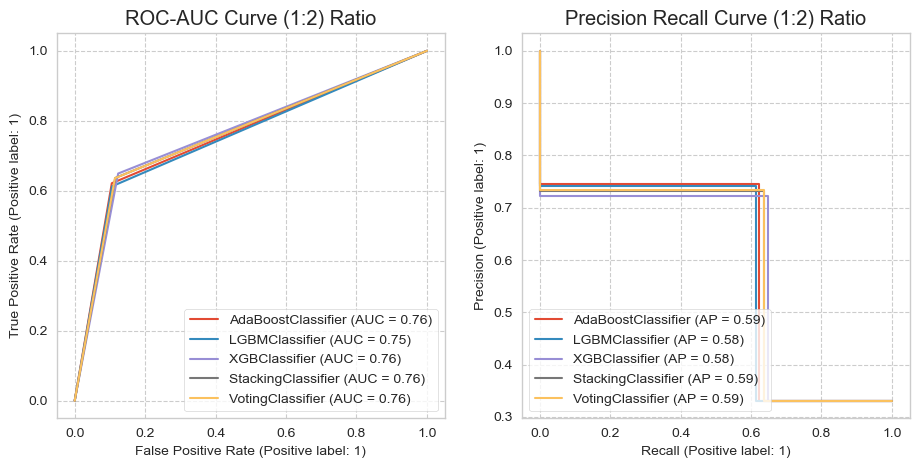

In [65]:
%%time
# Train Model with Different Sample Size

# performance_dataset = pd.DataFrame()

sample_size = 2

X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, sample_size)
print('In Sample Size {}, Traing Set - {} and Test Set - {}'.format(sample_size, X_train.shape[0], X_test.shape[0]))

# Machine Learning Model Build
classifier_model = [
                    AdaBoostClassifier(learning_rate = 0.1, n_estimators=500, random_state=42), 
                    XGBClassifier(colsample_bytree=1.0, gamma=5, learning_rate=1.0, max_depth=5, min_child_weight=1,    n_estimators=10, subsample=1.0, random_state=42),
                    LGBMClassifier(boosting_type = 'dart', colsample_bytree=1.0, learning_rate = 0.1, max_depth=10,n_estimators = 50, subsample=0.6, random_state=42, verbose=-1)
                ]

# Call Classification module
ind_class_model_df        = build_individual_classifier_model(X_train, X_test, y_train, y_test, classifier_model, sample_size)
ind_voting_model_df       = build_voting_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_class_model_df, sample_size)
ind_voting_stack_model_df = build_stacking_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_voting_model_df, sample_size)
ind_voting_stack_model_df['Sample_Size'] = f'1:{sample_size}'
ind_voting_stack_model_df.to_csv(f'performance_for_1_{sample_size}.csv', index=False)
performance_dataset = performance_dataset.append(ind_voting_stack_model_df)
    
# Show Performance Viz
create_performance_graphs(X_test, y_test, sample_size)

In Sample Size 3, Traing Set - 211766 and Test Set - 52942
Into build_individual_classifier_model
Into build_voting_classifier_model
Into build_stacking_classifier_model
CPU times: total: 18min 33s
Wall time: 38min 3s


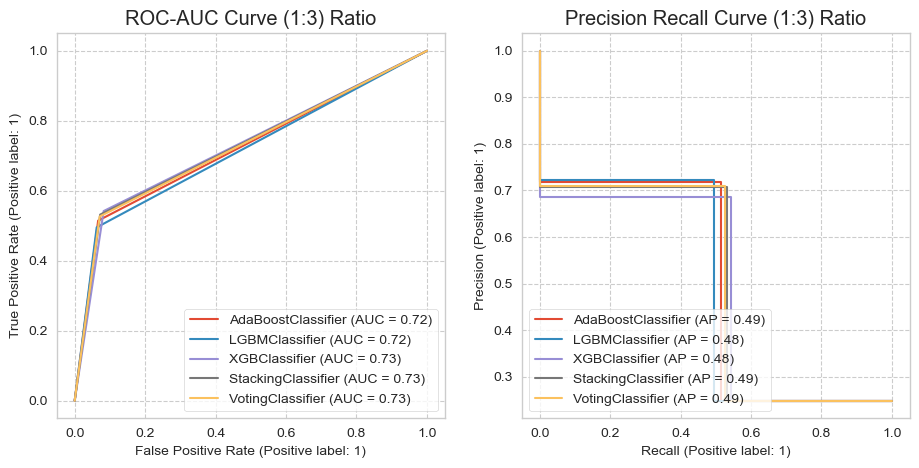

In [67]:
%%time
# Train Model with Different Sample Size

# performance_dataset = pd.DataFrame()
sample_size = 3

X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, sample_size)
print('In Sample Size {}, Traing Set - {} and Test Set - {}'.format(sample_size, X_train.shape[0], X_test.shape[0]))

# Machine Learning Model Build
classifier_model = [
                    AdaBoostClassifier(learning_rate = 0.1, n_estimators=500, random_state=42), 
                    XGBClassifier(colsample_bytree=1.0, gamma=5, learning_rate=1.0, max_depth=5, min_child_weight=1,    n_estimators=10, subsample=1.0, random_state=42),
                    LGBMClassifier(boosting_type = 'dart', colsample_bytree=1.0, learning_rate = 0.1, max_depth=10,n_estimators = 50, subsample=0.6, random_state=42, verbose=-1)
                ]

# Call Classification module
ind_class_model_df        = build_individual_classifier_model(X_train, X_test, y_train, y_test, classifier_model, sample_size)
ind_voting_model_df       = build_voting_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_class_model_df, sample_size)
ind_voting_stack_model_df = build_stacking_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_voting_model_df, sample_size)
ind_voting_stack_model_df['Sample_Size'] = f'1:{sample_size}'
ind_voting_stack_model_df.to_csv(f'performance_for_1_{sample_size}.csv', index=False)
performance_dataset = performance_dataset.append(ind_voting_stack_model_df)
    
# Show Performance Viz
create_performance_graphs(X_test, y_test, sample_size)

In [52]:
performance_dataset

,Classifier,Conf_Mtrx,Accuracy,Precision,Recall,F1_Score,ROC_AUC_Scr,CV_Score,FPR,TPR,Sample_Size
1,XGBClassifier,"[[10232, 2903], [2907, 10429]]",0.78,0.78,0.78,0.78,0.78,0.78,"[0.0, 0.22101256185763227, 1.0]","[0.0, 0.7820185962807439, 1.0]",1:1
0,AdaBoostClassifier,"[[10376, 2759], [3012, 10324]]",0.78,0.79,0.77,0.78,0.78,0.78,"[0.0, 0.21004948610582413, 1.0]","[0.0, 0.7741451709658068, 1.0]",1:1
2,LGBMClassifier,"[[10168, 2967], [2918, 10418]]",0.78,0.78,0.78,0.78,0.78,0.78,"[0.0, 0.225885039969547, 1.0]","[0.0, 0.7811937612477504, 1.0]",1:1
0,VotingClassifier,"[[10260, 2875], [2895, 10441]]",0.78,0.78,0.78,0.78,0.78,0.78,"[0.0, 0.21888085268366958, 1.0]","[0.0, 0.7829184163167366, 1.0]",1:1
0,StackingClassifier,"[[10265, 2870], [2900, 10436]]",0.78,0.78,0.78,0.78,0.78,0.78,"[0.0, 0.21850019033117624, 1.0]","[0.0, 0.7825434913017396, 1.0]",1:1


In [ ]:
%%time
# Train Model with Different Sample Size

performance_dataset1 = pd.DataFrame()

for sample_size in range(1, 2):

    X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, sample_size)
    print('In Sample Size {}, Traing Set - {} and Test Set - {}'.format(sample_size, X_train.shape[0], X_test.shape[0]))

    # Machine Learning Model Build
    classifier_model = [
                        AdaBoostClassifier(learning_rate = 0.1, n_estimators=500, random_state=42), 
                        XGBClassifier(colsample_bytree=1.0, gamma=5, learning_rate=1.0, max_depth=5, min_child_weight=1,    n_estimators=10, subsample=1.0, random_state=42),
                        LGBMClassifier(boosting_type = 'dart', colsample_bytree=1.0, learning_rate = 0.1, max_depth=10,n_estimators = 50, subsample=0.6, random_state=42, verbose=-1)
                    ]

    # Call Classification module
    ind_class_model_df        = build_individual_classifier_model(X_train, X_test, y_train, y_test, classifier_model, sample_size)
    ind_voting_model_df       = build_voting_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_class_model_df, sample_size)
    ind_voting_stack_model_df = build_stacking_classifier_model(X_train, X_test, y_train, y_test, classifier_model, ind_voting_model_df, sample_size)
    ind_voting_stack_model_df['Sample_Size'] = f'1:{sample_size}'

    performance_dataset = performance_dataset.append(ind_voting_stack_model_df)
    
    # Show Performance Viz
    create_performance_graphs(X_test, y_test, sample_size)

In [69]:
performance_dataset.to_csv('../model/performance.csv', index=False)

### GRID SEARCH

In [ ]:
%%time
# Light GBM base model
# Initiate classifier to use
lgbm_classifier = LGBMClassifier(random_state=42)

# Grid Search for Light GBM
gridParams = {
                'n_estimators': [10, 50, 100, 500],
                'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
                'colsample_bytree': [0.6, 0.8, 1.0],
                'subsample' : [0.6, 0.8, 1.0],
                'max_depth': [2, 4, 6, 8, 10]
    }

grid = GridSearchCV(lgbm_classifier, gridParams, verbose=1, cv=4, n_jobs=-1, scoring = 'recall')
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
%%time
# Xtreme GBM base model
# Initiate classifier to use
xgb_classifier = XGBClassifier(random_state=42)

# Grid Search for XGBOOST
gridParams = {
        'n_estimators': [10, 50, 100, 500],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid = GridSearchCV(xgb_classifier, gridParams, verbose=1, cv=5, n_jobs=-1, scoring = 'recall')
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
%%time
# AdaBoost Base Model
# Initiate classifier to use
abc_classifier = AdaBoostClassifier(random_state=42)

# Grid Search for XGBOOST
gridParams = {
        'n_estimators': [10, 50, 100, 500],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
        }

grid = GridSearchCV(abc_classifier, gridParams, verbose=1, cv=5, n_jobs=-1, scoring = 'recall')
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

'Shape of train_df_fraud (66177, 12)'

'Shape of train_df_non_fraud (66177, 12)'

In Sample Size 1, Traing Set - 105883 and Test Set - 26471
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


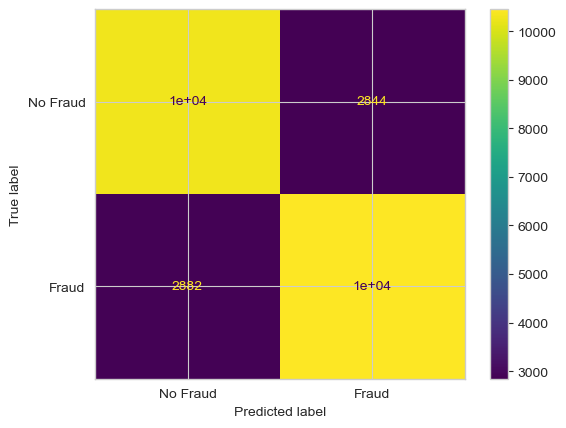

In [29]:
for sample_size in range(1, 2):

    X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, sample_size)
    print('In Sample Size {}, Traing Set - {} and Test Set - {}'.format(sample_size, X_train.shape[0], X_test.shape[0]))

    classifier = joblib.load('../model/sample_1_1/VotingClassifier.pkl')
    predictions = classifier.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['No Fraud', 'Fraud'])
    disp.plot()

'Shape of train_df_fraud (66177, 12)'

'Shape of train_df_non_fraud (66177, 12)'

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


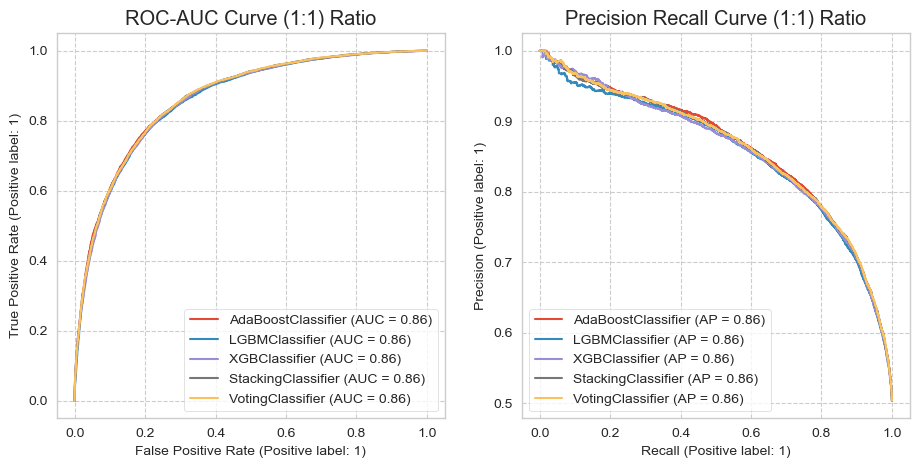

In [40]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

# Sample Ratio 1:1
classifier_list = ['AdaBoostClassifier.pkl', 'LGBMClassifier.pkl', 'XGBClassifier.pkl', 'StackingClassifier.pkl', 'VotingClassifier.pkl']

fig, [ax_roc, ax_prc] = plt.subplots(1, 2, figsize=(11, 5))

# Required to extract the test data
X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, 1) # 1is for 1:1 Sample.

for classifiers in classifier_list:
    classifier = joblib.load(f'../model/sample_1_1/{classifiers}')
    RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax_roc, name=classifier.__class__.__name__)
    PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, ax=ax_prc, name=classifier.__class__.__name__)

ax_roc.set_title("ROC-AUC Curve (1:1) Ratio")
ax_prc.set_title("Precision Recall Curve (1:1) Ratio")

ax_roc.grid(linestyle="--")
ax_prc.grid(linestyle="--")

'Shape of train_df_fraud (66177, 12)'

'Shape of train_df_non_fraud (132354, 12)'

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


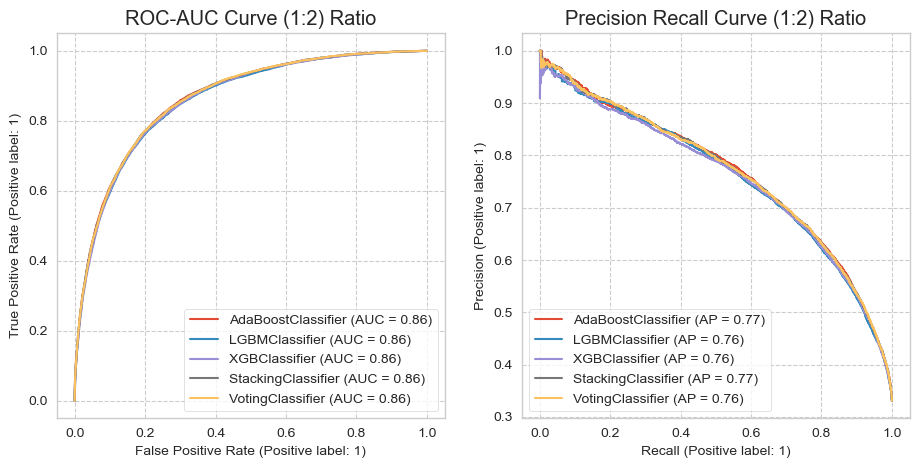

In [42]:
# Sample Ratio 1:2
classifier_list = ['AdaBoostClassifier.pkl', 'LGBMClassifier.pkl', 'XGBClassifier.pkl', 'StackingClassifier.pkl', 'VotingClassifier.pkl']

fig, [ax_roc, ax_prc] = plt.subplots(1, 2, figsize=(11, 5))

# Required to extract the test data
X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, 2) # 2 is for 1:2 Sample.

for classifiers in classifier_list:
    classifier = joblib.load(f'../model/sample_1_2/{classifiers}')
    RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax_roc, name=classifier.__class__.__name__)
    PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, ax=ax_prc, name=classifier.__class__.__name__)

ax_roc.set_title("ROC-AUC Curve (1:2) Ratio")
ax_prc.set_title("Precision Recall Curve (1:2) Ratio")

ax_roc.grid(linestyle="--")
ax_prc.grid(linestyle="--")

'Shape of train_df_fraud (66177, 12)'

'Shape of train_df_non_fraud (198531, 12)'

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


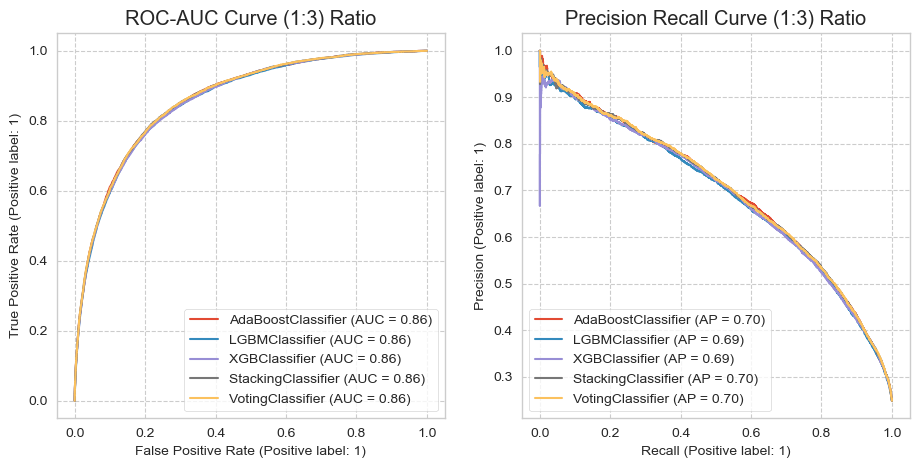

In [41]:
# Sample Ratio 1:3
classifier_list = ['AdaBoostClassifier.pkl', 'LGBMClassifier.pkl', 'XGBClassifier.pkl', 'StackingClassifier.pkl', 'VotingClassifier.pkl']

fig, [ax_roc, ax_prc] = plt.subplots(1, 2, figsize=(11, 5))

# Required to extract the test data
X_train, y_train, X_test, y_test = create_sample_set(intellifraud_dataset_num, 3) # 3 is for 1:3 Sample.

for classifiers in classifier_list:
    classifier = joblib.load(f'../model/sample_1_3/{classifiers}')
    RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax_roc, name=classifier.__class__.__name__)
    PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, ax=ax_prc, name=classifier.__class__.__name__)

ax_roc.set_title("ROC-AUC Curve (1:3) Ratio")
ax_prc.set_title("Precision Recall Curve (1:3) Ratio")

ax_roc.grid(linestyle="--")
ax_prc.grid(linestyle="--")